# TP1 - Mentoría

## Paso 1: Carga y exploración inicial de datos

1.	Cargar los datos.
2.	Explora la estructura de los datos: número de observaciones, variables disponibles, intervalo de tiempo entre observaciones, etc.
3.	Observa las primeras y últimas filas de los datos para tener una idea general de su contenido.
4.	Verifica si hay valores faltantes o atípicos en los datos y propongan cómo manejarlos.


In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ventas = pd.read_csv('/content/drive/MyDrive/muestra_diplodatos_ventas_2023.csv')

<ipython-input-47-eda1eb52eee3>:1: DtypeWarning: Columns (10,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  ventas = pd.read_csv('/content/drive/MyDrive/muestra_diplodatos_ventas_2023.csv')


In [ ]:
ventas.head()

,ID_VENDEDOR,INSCRIPCION,AÑO,MES,CATEGORIA,DEPOSITO,DESCRIPCION_CATEGORIA,TOTAL_VENTAS,PORCENTAJE_COMISION_EMPRESA,COMISION_EMPRESA,TRATAMIENTO_FISCAL,DESC_TRATAMIENTO_FISCAL,TRATAMIENTO_DIFERNCIAL,CM04,CATEGORIA (Ajustado),SUB-CATEGORIA,NOMBRE,OMEGA,MODELO
0,0520ed45f48b92cf903130d467021c242be8045cfed4ab...,270417671,2019,1,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,469090,Venta al por mayor de mercancías n.c.p.,"14,622.16",0.03,409.42,0.00,Normal,NaN,NaN,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,"Venta de Artículos, productos, accesorios, etc...",d7fe2144f50da08790400f3fc5217b4a4c6042e05b5f2f...,1,0
1,95b704f66684b2101d104491983c7cf88455b04d4ecf8f...,270118305,2019,1,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,464129,Venta al por mayor de prendas y accesorios de ...,"62,477.00",0.04,"2,499.08",0.00,Normal,NaN,NaN,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,"Venta de Artículos, productos, accesorios, etc...",fbadfc9f6105a8792048a825deb9801fa54106e21e8283...,1,0
2,95b704f66684b2101d104491983c7cf88455b04d4ecf8f...,270118305,2019,1,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,475190,Venta al por menor de artículos textiles n.c.p...,"3,373,941.00",0.04,"134,957.64",0.00,Normal,NaN,NaN,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,"Venta de Artículos, productos, accesorios, etc...",fbadfc9f6105a8792048a825deb9801fa54106e21e8283...,1,0
3,95b704f66684b2101d104491983c7cf88455b04d4ecf8f...,270118305,2019,1,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,477190,Venta al por menor de prendas y accesorios de ...,"332,660.00",0.04,"13,306.40",0.00,Normal,NaN,NaN,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,"Venta de Artículos, productos, accesorios, etc...",fbadfc9f6105a8792048a825deb9801fa54106e21e8283...,1,0
4,1b6ef2976d38132a1df85b4199dcddd0158ab42c957184...,281129121,2019,1,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,469090,Venta al por mayor de mercancías n.c.p.,"695,685.00",0.04,"27,827.40",0.00,Normal,NaN,NaN,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,"Venta de Artículos, productos, accesorios, etc...",4c369e674e00fd385f3009dbc3825b8681112283301620...,1,0


In [ ]:
print(len(ventas), 'observaciones')

431506 observaciones


In [ ]:
lista_columnas = list(ventas.columns)
print(len(lista_columnas), 'variables:')
lista_columnas

19 variables:


['ID_VENDEDOR',
 'INSCRIPCION',
 'AÑO',
 'MES',
 'CATEGORIA',
 'DEPOSITO',
 'DESCRIPCION_CATEGORIA',
 'TOTAL_VENTAS',
 'PORCENTAJE_COMISION_EMPRESA',
 'COMISION_EMPRESA',
 'TRATAMIENTO_FISCAL',
 'DESC_TRATAMIENTO_FISCAL',
 'TRATAMIENTO_DIFERNCIAL',
 'CM04',
 'CATEGORIA (Ajustado)',
 'SUB-CATEGORIA',
 'NOMBRE',
 'OMEGA',
 'MODELO']

Significado tentativo:
*   **ID_VENDEDOR**: Clave identificación vendedor
*   **INSCRIPCION**: ???
*   **AÑO**: Año (2019 a 2022)
*   **MES**: 	Mes
*   **CATEGORIA**: Descripción del Código de Actividad Codiguero NAES Año 2018 y siguientes
*   **DEPOSITO**: ???
*   **DESCRIPCION_CATEGORIA**: Subrubro definido por la DGR (Dato Interno, no declarado por el contribuyente).
*   **TOTAL_VENTAS**: Monto total de ventas (base imponible)
*   **PORCENTAJE_COMISION_EMPRESA**: Comisión por las ventas en la plataforma (alícuota)
*   **COMISION_EMPRESA**: Comisión por las ventas en la plataforma (valor)
*   **TRATAMIENTO_FISCAL**: Indica qué tratamiento fiscal se le da a la operación (o vendedor/comprador?), especialmente respecto a la alícuota a cobrarle.
*   **DESC_TRATAMIENTO_FISCAL**: Categoriza los valores de "TRATAMIENTO_FISCAL"
*   **TRATAMIENTO_DIFERNCIAL**: Indica el artículo de alguna reglamentación aplicado para dar tratamiento fiscal especial
*   **CM04**: Puede marcar las operaciones bajo Convenio Multilateral (CM) o indicar que se trata de un vendedor inscripto en el CM. Ver.
*   **CATEGORIA (Ajustado)**: Variable "CATEGORIA" limpia (se redujo el número de valores posibles)
*   **SUB-CATEGORIA**: Variable "DESCRIPCION_CATEGORIA" limpia (se redujo el número de valores posibles)
*   **NOMBRE**: Nombre del vendedor? Del comprador?
*   **OMEGA**: Marca para contribuyente de interés fiscal especial?? (Todos tienen valor "1")
*   **MODELO**: Marca para vendedor modelo

In [ ]:
ventas.dtypes

ID_VENDEDOR                     object
INSCRIPCION                      int64
AÑO                              int64
MES                              int64
CATEGORIA                       object
DEPOSITO                         int64
DESCRIPCION_CATEGORIA           object
TOTAL_VENTAS                   float64
PORCENTAJE_COMISION_EMPRESA    float64
COMISION_EMPRESA               float64
TRATAMIENTO_FISCAL              object
DESC_TRATAMIENTO_FISCAL         object
TRATAMIENTO_DIFERNCIAL          object
CM04                            object
CATEGORIA (Ajustado)            object
SUB-CATEGORIA                   object
NOMBRE                          object
OMEGA                            int64
MODELO                           int64
dtype: object

In [ ]:
ventas.describe()

,INSCRIPCION,AÑO,MES,DEPOSITO,TOTAL_VENTAS,PORCENTAJE_COMISION_EMPRESA,COMISION_EMPRESA,OMEGA,MODELO
count,"431,506.00","431,506.00","431,506.00","431,506.00","431,506.00","431,506.00","431,506.00","431,506.00","431,506.00"
mean,"7,734,967,948.01","2,020.33",6.08,"467,002.73","7,544,169.21",3.23,"293,840.57",1.00,0.00
std,"6,765,375,119.13",1.03,3.43,"89,922.56","48,373,412.84",2.68,"1,860,463.91",0.00,0.06
min,"200,026,373.00","2,019.00",1.00,"451,111.00","-239,930,463.21",0.00,"-4,904,326.95",1.00,0.00
25%,"281,394,843.00","2,019.00",3.00,"462,120.00",0.00,0.05,0.00,1.00,0.00
50%,"9,040,031,339.00","2,020.00",6.00,"465,310.00","90,996.38",4.00,"3,503.35",1.00,0.00
75%,"9,042,569,642.00","2,021.00",9.00,"471,192.00","3,226,319.32",4.75,"126,875.03",1.00,0.00
max,"33,716,777,249.00","2,022.00",12.00,"8,530,190.00","4,876,872,188.46",18.00,"243,843,609.42",1.00,1.00


<Axes: >

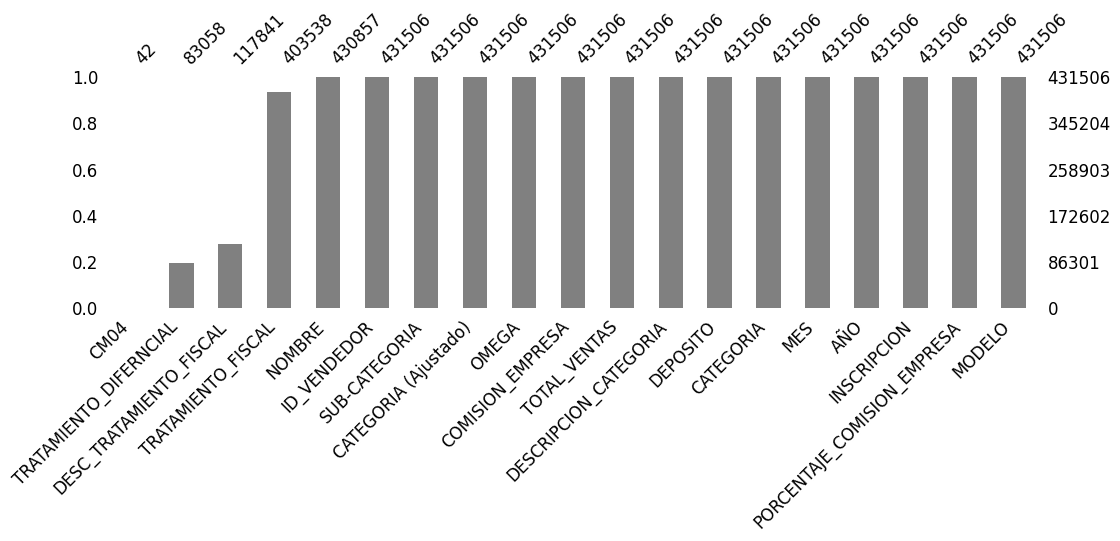

In [ ]:
msno.bar(ventas,figsize=(12, 3), sort="ascending",fontsize=12, color='gray')

In [ ]:
recuentos = {}

for columna in ventas.columns:
    recuento = ventas[columna].value_counts()
    recuentos[columna] = recuento
    print(f"Recuento de categorías para la columna '{columna}':")
    print(recuento)
    print()
    print()
    print()

Recuento de categorías para la columna 'ID_VENDEDOR':
f679b20b02309cab33658571f0c8da237f57f732ab96978386a95c2776f07c21    1667
ec21dabdae55fb2168ff9b225db59e98b4731306282cc8314d6b0a39b0cd69b5    1428
c8237c3a8f089f0e8d5f47fe38f34fba1091868d1f64b3748970603e2d2c3f60    1291
ab4757eac54ed54acd482d387ec67488d3df1f4e6e9ef3d2d4797ebd242b7498    1285
c7c203782eda1914c60d9dcf10dc4756b5f654a49688b5bf5c955073c8990872    1263
                                                                    ... 
7317af93e9c784f04b8a262ce46596e498cdcad89ff4f964c553ef259655c63f       1
d8b1096b82fba7ff56972a2fc91677ea8369c0c2cfafbe642700a265eec80ec8       1
56a99357adce2fd526e355a9cbbebe1f7d48d02be4ad57a59c233c140ad3c5fe       1
0ad1ebdd5ba13d7595fb4a9816559a194cf30b3d59685def1e1c4bc389d328b5       1
527516369108233076b79ec72deacb04b450a5a58c74191bc1a3ee733d056ab0       1
Name: ID_VENDEDOR, Length: 3209, dtype: int64



Recuento de categorías para la columna 'INSCRIPCION':
9043011028    1667
9042454829    1291
90



En base a lo visto hasta aquí, se podría prescindir de las variables "CATEGORIA" y "DESCRIPCION_CATEGORIA" (superadas por "CATEGORIA (Ajustado)" y "SUB-CATEGORIA", respectivamente).

También se podría prescindir de la variable "OMEGA", por no aportar información relevante (es constante).

Al igual que con "CATEGORIA (Ajustado)"

In [ ]:
ventas_clean = ventas.drop(['CATEGORIA', 'DESCRIPCION_CATEGORIA', 'OMEGA', 'CATEGORIA (Ajustado)'], axis=1).copy()
ventas_clean.head()

,ID_VENDEDOR,INSCRIPCION,AÑO,MES,DEPOSITO,TOTAL_VENTAS,PORCENTAJE_COMISION_EMPRESA,COMISION_EMPRESA,TRATAMIENTO_FISCAL,DESC_TRATAMIENTO_FISCAL,TRATAMIENTO_DIFERNCIAL,CM04,SUB-CATEGORIA,NOMBRE,MODELO
0,0520ed45f48b92cf903130d467021c242be8045cfed4ab...,270417671,2019,1,469090,"14,622.16",0.03,409.42,0.00,Normal,NaN,NaN,"Venta de Artículos, productos, accesorios, etc...",d7fe2144f50da08790400f3fc5217b4a4c6042e05b5f2f...,0
1,95b704f66684b2101d104491983c7cf88455b04d4ecf8f...,270118305,2019,1,464129,"62,477.00",0.04,"2,499.08",0.00,Normal,NaN,NaN,"Venta de Artículos, productos, accesorios, etc...",fbadfc9f6105a8792048a825deb9801fa54106e21e8283...,0
2,95b704f66684b2101d104491983c7cf88455b04d4ecf8f...,270118305,2019,1,475190,"3,373,941.00",0.04,"134,957.64",0.00,Normal,NaN,NaN,"Venta de Artículos, productos, accesorios, etc...",fbadfc9f6105a8792048a825deb9801fa54106e21e8283...,0
3,95b704f66684b2101d104491983c7cf88455b04d4ecf8f...,270118305,2019,1,477190,"332,660.00",0.04,"13,306.40",0.00,Normal,NaN,NaN,"Venta de Artículos, productos, accesorios, etc...",fbadfc9f6105a8792048a825deb9801fa54106e21e8283...,0
4,1b6ef2976d38132a1df85b4199dcddd0158ab42c957184...,281129121,2019,1,469090,"695,685.00",0.04,"27,827.40",0.00,Normal,NaN,NaN,"Venta de Artículos, productos, accesorios, etc...",4c369e674e00fd385f3009dbc3825b8681112283301620...,0


In [ ]:
ventas_clean['FECHA'] = pd.to_datetime(ventas_clean['MES'].astype(str) + '-' + ventas_clean['AÑO'].astype(str), format='%m-%Y').dt.to_period('M')
ventas_clean.head()

,ID_VENDEDOR,INSCRIPCION,AÑO,MES,DEPOSITO,TOTAL_VENTAS,PORCENTAJE_COMISION_EMPRESA,COMISION_EMPRESA,TRATAMIENTO_FISCAL,DESC_TRATAMIENTO_FISCAL,TRATAMIENTO_DIFERNCIAL,CM04,SUB-CATEGORIA,NOMBRE,MODELO,FECHA
0,0520ed45f48b92cf903130d467021c242be8045cfed4ab...,270417671,2019,1,469090,"14,622.16",0.03,409.42,0.00,Normal,NaN,NaN,"Venta de Artículos, productos, accesorios, etc...",d7fe2144f50da08790400f3fc5217b4a4c6042e05b5f2f...,0,2019-01
1,95b704f66684b2101d104491983c7cf88455b04d4ecf8f...,270118305,2019,1,464129,"62,477.00",0.04,"2,499.08",0.00,Normal,NaN,NaN,"Venta de Artículos, productos, accesorios, etc...",fbadfc9f6105a8792048a825deb9801fa54106e21e8283...,0,2019-01
2,95b704f66684b2101d104491983c7cf88455b04d4ecf8f...,270118305,2019,1,475190,"3,373,941.00",0.04,"134,957.64",0.00,Normal,NaN,NaN,"Venta de Artículos, productos, accesorios, etc...",fbadfc9f6105a8792048a825deb9801fa54106e21e8283...,0,2019-01
3,95b704f66684b2101d104491983c7cf88455b04d4ecf8f...,270118305,2019,1,477190,"332,660.00",0.04,"13,306.40",0.00,Normal,NaN,NaN,"Venta de Artículos, productos, accesorios, etc...",fbadfc9f6105a8792048a825deb9801fa54106e21e8283...,0,2019-01
4,1b6ef2976d38132a1df85b4199dcddd0158ab42c957184...,281129121,2019,1,469090,"695,685.00",0.04,"27,827.40",0.00,Normal,NaN,NaN,"Venta de Artículos, productos, accesorios, etc...",4c369e674e00fd385f3009dbc3825b8681112283301620...,0,2019-01


In [ ]:
ventas_clean['FECHA'].dtypes

period[M]

*   Qué representa cada caso? Se trata de ventas, de ventas por mes, vendedores por mes?

In [ ]:
# Vamos a eliminar duplicados por ID_VENDEDOR y FECHA
prueba1 = ventas_clean.drop_duplicates(subset=['ID_VENDEDOR', 'FECHA']).copy()
print(len(prueba1))
print(len(ventas_clean))

127951
431506


In [ ]:
# Lo anterior implica que hay más de una observación para cada mes por vendedor. Probablemente cada caso represente operaciones de ventas individuales.

*   "ID_VENDEDOR" se corresponde con "NOMBRE"?

In [ ]:
# Cuántos ID_VENDEDOR únicos hay?
prueba2 = ventas_clean.drop_duplicates(subset='ID_VENDEDOR').copy()
print(len(prueba2))

3209


In [ ]:
# Cuántos NOMBRE únicos hay?
prueba3 = ventas_clean.drop_duplicates(subset='NOMBRE').copy()
print(len(prueba3))

3200


In [ ]:
# Implica que hay algunos ID_VENDEDOR que tienen el mismo NOMBRE

In [ ]:
# Quizas se pueda eliminar la variabla NOMBRE

*   Cómo se relacionan TRATAMIENTO_FISCAL,	DESC_TRATAMIENTO_FISCAL y	TRATAMIENTO_DIFERNCIAL?


<Axes: >

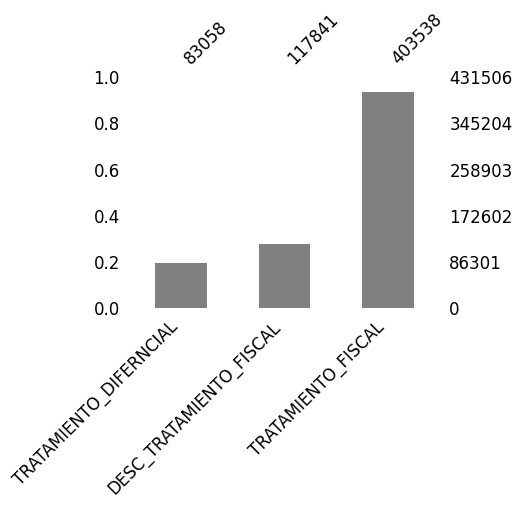

In [ ]:
msno.bar(ventas_clean[['TRATAMIENTO_FISCAL', 'DESC_TRATAMIENTO_FISCAL', 'TRATAMIENTO_DIFERNCIAL']],figsize=(4, 3), sort="ascending",fontsize=12, color='gray')

In [ ]:
# La variable con más casos es TRATAMIENTO_FISCAL

In [ ]:
ventas_clean['TRATAMIENTO_FISCAL'].value_counts()

Normal               183610
Alícuota agravada     86271
0                     81696
0.0                   29499
Especial 1             5693
3                      4178
Especial 2             4163
Exento/Desgravado      2051
3.0                    1681
Minorista              1309
Alícuota reducida      1129
Especial 4              742
Especial 3              624
1                       592
1.0                     193
Mera Compra             105
2.0                       2
Name: TRATAMIENTO_FISCAL, dtype: int64

In [ ]:
# Parece que asume valores enteros, floats y strings.
# Pero acá se ve que los que parecen enteros, en realidad son strings
ventas_clean['TRATAMIENTO_FISCAL'].unique()

array([0.0, 3.0, nan, 1.0, 2.0, '0', '3', '1', 'Normal', 'Especial 1',
       'Minorista', 'Exento/Desgravado', 'Alícuota agravada',
       'Alícuota reducida', 'Especial 2', 'Especial 4', 'Especial 3',
       'Mera Compra'], dtype=object)

In [ ]:
# En primera instancia, se podrían forzar los floats hacia strings.
ventas_clean['TRATAMIENTO_FISCAL'] = ventas_clean['TRATAMIENTO_FISCAL'].replace({0.0: '0', 3.0: '3', 2.0: '2', 1.0: '1'})

In [ ]:
ventas_clean['TRATAMIENTO_FISCAL'].value_counts()

Normal               183610
0                    111195
Alícuota agravada     86271
3                      5859
Especial 1             5693
Especial 2             4163
Exento/Desgravado      2051
Minorista              1309
Alícuota reducida      1129
1                       785
Especial 4              742
Especial 3              624
Mera Compra             105
2                         2
Name: TRATAMIENTO_FISCAL, dtype: int64

In [ ]:
# Ahora veamos para qué valores de TRATAMIENTO FISCAL, suelen aparecer valores de DESC_TRATAMIENTO_FISCAL

In [ ]:
# Este paso lo agrego porque sino el crosstab siguiente no me muestra los NaN
prueba5 = ventas_clean.copy()
prueba5['TRATAMIENTO_FISCAL'] = prueba5['TRATAMIENTO_FISCAL'].fillna('')
prueba5['DESC_TRATAMIENTO_FISCAL'] = prueba5['DESC_TRATAMIENTO_FISCAL'].fillna('')

In [ ]:
pd.crosstab(prueba5['TRATAMIENTO_FISCAL'], prueba5['DESC_TRATAMIENTO_FISCAL'], dropna=False)

DESC_TRATAMIENTO_FISCAL,,Exento/Desgravado,Minorista,Normal,Otro Tratamiento Fiscal
TRATAMIENTO_FISCAL,,,,,
,27968,0,0,0,0
0,0,0,0,111195,0
1,0,785,0,0,0
2,0,0,2,0,0
3,0,0,0,0,5859
Alícuota agravada,86271,0,0,0,0
Alícuota reducida,1129,0,0,0,0
Especial 1,5693,0,0,0,0
Especial 2,4163,0,0,0,0


In [ ]:
# Los valores de DESC_TRATAMIENTO_FISCAL, solo aparecen cuando TRATAMIENTO_FISCAL asume valores 0, 1, 2, 3.
# A su vez, hay correspondencia entre 0 y Normal, 1 y Exento/Desgravado, 2 y Minorista, 3 y Otro Tratamiento Fiscal

In [ ]:
# Se podría eliminar DESC_TRATAMIENTO_FISCAL?

In [ ]:
# Ahora veamos para qué valores de TRATAMIENTO FISCAL, suelen aparecer valores de TRATAMIENTO_DIFERNCIAL

In [ ]:
# Este paso lo agrego porque sino el crosstab siguiente no me muestra los NaN
prueba5['TRATAMIENTO_DIFERNCIAL'] = prueba5['TRATAMIENTO_DIFERNCIAL'].fillna('')

In [ ]:
pd.crosstab(prueba5['TRATAMIENTO_FISCAL'], prueba5['TRATAMIENTO_DIFERNCIAL'], dropna=False)

TRATAMIENTO_DIFERNCIAL,,Artículo 16,Artículo 17,Artículo 18,Artículo 19,Artículo 19 y 20,Artículo 20,Artículo 21,Artículo 22,Artículo 28,Artículo 31,Artículo 34
TRATAMIENTO_FISCAL,,,,,,,,,,,,
,20366,390,50,1098,97,1720,533,3236,353,47,65,13
0,91558,813,254,1226,1142,2389,3071,7489,412,167,726,1948
1,583,0,0,15,36,0,14,134,0,0,1,2
2,2,0,0,0,0,0,0,0,0,0,0,0
3,354,0,107,25,562,1018,80,3039,671,0,2,1
Alícuota agravada,79049,608,12,181,114,81,2706,1772,1025,0,56,667
Alícuota reducida,706,249,0,17,0,9,36,75,1,0,0,36
Especial 1,1726,106,81,313,381,185,1087,983,750,74,2,5
Especial 2,9,1,0,54,0,75,330,1901,1793,0,0,0


In [ ]:
# No hay un patrón claro

*   Ventas, comisión y % de comisión están relacionadas entre sí con alguna fórmula?

In [ ]:
ventas_clean[['TOTAL_VENTAS','PORCENTAJE_COMISION_EMPRESA','COMISION_EMPRESA']].describe()

,TOTAL_VENTAS,PORCENTAJE_COMISION_EMPRESA,COMISION_EMPRESA
count,"431,506.00","431,506.00","431,506.00"
mean,"7,544,169.21",3.23,"293,840.57"
std,"48,373,412.84",2.68,"1,860,463.91"
min,"-239,930,463.21",0.00,"-4,904,326.95"
25%,0.00,0.05,0.00
50%,"90,996.38",4.00,"3,503.35"
75%,"3,226,319.32",4.75,"126,875.03"
max,"4,876,872,188.46",18.00,"243,843,609.42"


In [ ]:
# TOTAL_VENTAS tiene valores negativos. Cuandos?
len(ventas_clean[ventas_clean['TOTAL_VENTAS'] < 0])

1390

In [ ]:
ventas_clean[ventas_clean['TOTAL_VENTAS'] < 0]['TOTAL_VENTAS'].describe()

count          1,390.00
mean      -2,523,550.73
std       10,702,005.43
min     -239,930,463.21
25%         -850,102.67
50%          -83,196.49
75%           -7,138.79
max               -0.41
Name: TOTAL_VENTAS, dtype: float64

In [ ]:
# Hay al menos un valor extremo muy grande.
# Debido a que son pocos casos, podríamos reemplazar estos valores por vacíos (en caso que estén mal).

In [ ]:
# Se observa que COMISION_EMPRESA también tiene valores negativos en estos casos. También sería necesario reemplazar estos valores por vacíos
ventas_clean[ventas_clean['TOTAL_VENTAS'] < 0]['COMISION_EMPRESA'].describe()

count        1,390.00
mean       -96,482.02
std        359,186.69
min     -4,904,326.95
25%        -35,086.47
50%         -3,383.09
75%           -276.50
max              0.00
Name: COMISION_EMPRESA, dtype: float64

In [ ]:
# No pareciera haber valores extremos en PORCENTAJE_COMISION_EMPRESA
ventas_clean[ventas_clean['TOTAL_VENTAS'] < 0]['PORCENTAJE_COMISION_EMPRESA'].describe()

count   1,390.00
mean        4.36
std         2.35
min         0.00
25%         3.50
50%         4.75
75%         5.00
max        18.00
Name: PORCENTAJE_COMISION_EMPRESA, dtype: float64

In [ ]:
# ventas_clean.loc[ventas_clean['TOTAL_VENTAS'] < 0, 'TOTAL_VENTAS'] = np.nan
# ventas_clean.loc[np.isnan(ventas_clean['TOTAL_VENTAS']), 'COMISION_EMPRESA'] = np.nan
# ventas_clean.loc[np.isnan(ventas_clean['TOTAL_VENTAS']), 'PORCENTAJE_COMISION_EMPRESA'] = np.nan
# REVISAR (VER OTRA ALTERNATIVA AL nan)

In [ ]:
ventas_clean[['TOTAL_VENTAS','PORCENTAJE_COMISION_EMPRESA','COMISION_EMPRESA']].describe()

,TOTAL_VENTAS,PORCENTAJE_COMISION_EMPRESA,COMISION_EMPRESA
count,"431,506.00","431,506.00","431,506.00"
mean,"7,544,169.21",3.23,"293,840.57"
std,"48,373,412.84",2.68,"1,860,463.91"
min,"-239,930,463.21",0.00,"-4,904,326.95"
25%,0.00,0.05,0.00
50%,"90,996.38",4.00,"3,503.35"
75%,"3,226,319.32",4.75,"126,875.03"
max,"4,876,872,188.46",18.00,"243,843,609.42"


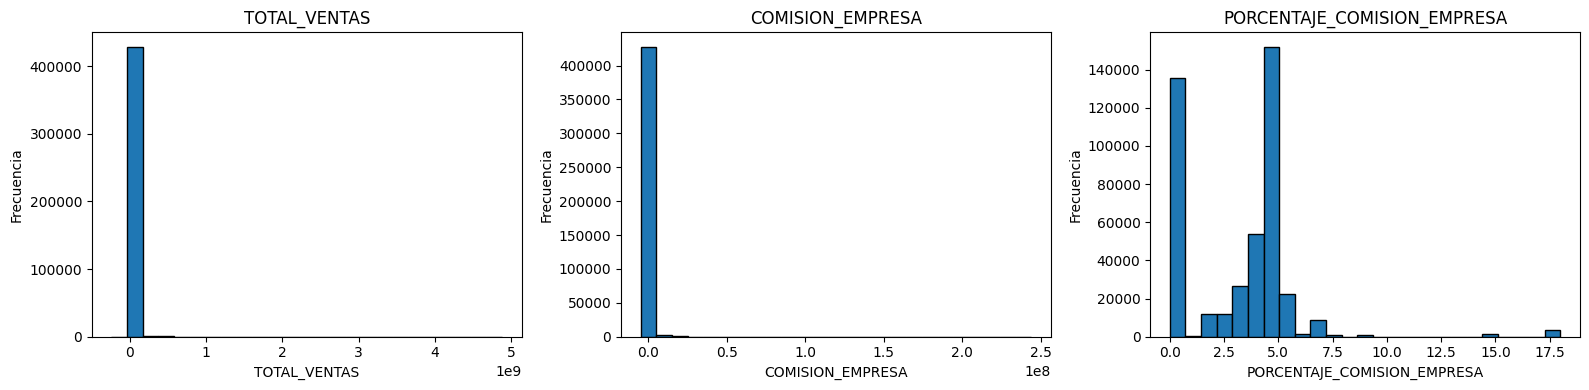

In [ ]:
# Crear una figura con tres subplots
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# Histograma para TOTAL_VENTAS
axs[0].hist(ventas_clean['TOTAL_VENTAS'], bins=25, edgecolor='black')
axs[0].set_xlabel('TOTAL_VENTAS')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('TOTAL_VENTAS')

# Histograma para COMISION_EMPRESA
axs[1].hist(ventas_clean['COMISION_EMPRESA'], bins=25, edgecolor='black')
axs[1].set_xlabel('COMISION_EMPRESA')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('COMISION_EMPRESA')

# Histograma para PORCENTAJE_COMISION_EMPRESA
axs[2].hist(ventas_clean['PORCENTAJE_COMISION_EMPRESA'], bins=25, edgecolor='black')
axs[2].set_xlabel('PORCENTAJE_COMISION_EMPRESA')
axs[2].set_ylabel('Frecuencia')
axs[2].set_title('PORCENTAJE_COMISION_EMPRESA')

# Ajustar los espacios entre subplots
fig.tight_layout()

# Mostrar los histogramas
plt.show()

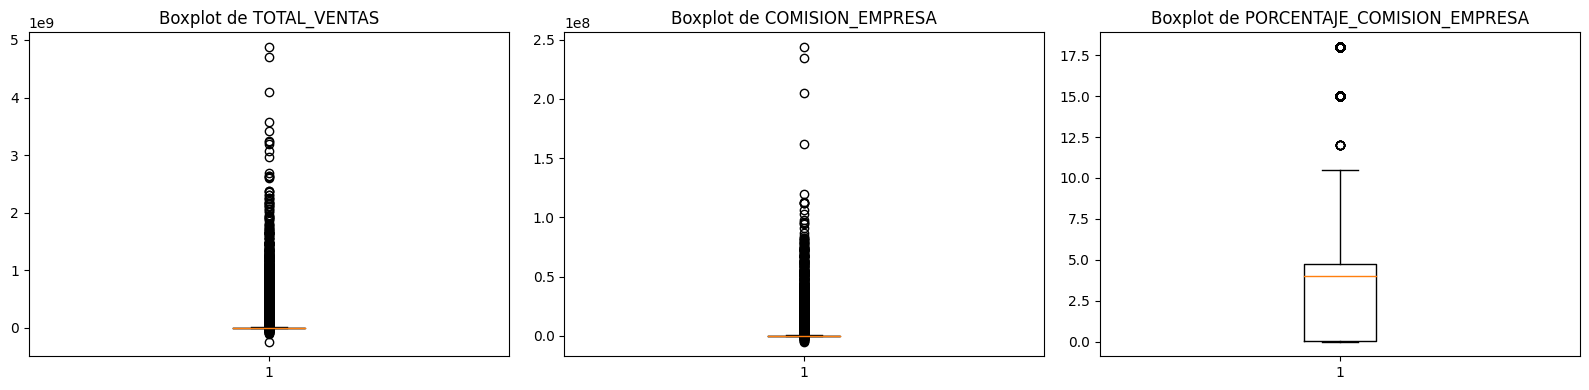

In [ ]:
# Crear la figura y los subplots
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# Boxplot para 'TOTAL_VENTAS'
axs[0].boxplot(ventas_clean['TOTAL_VENTAS'].dropna())
axs[0].set_title('Boxplot de TOTAL_VENTAS')

# Boxplot para 'COMISION_EMPRESA'
axs[1].boxplot(ventas_clean['COMISION_EMPRESA'].dropna())
axs[1].set_title('Boxplot de COMISION_EMPRESA')

# Boxplot para 'PORCENTAJE_COMISION_EMPRESA'
axs[2].boxplot(ventas_clean['PORCENTAJE_COMISION_EMPRESA'].dropna())
axs[2].set_title('Boxplot de PORCENTAJE_COMISION_EMPRESA')

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [ ]:
# Deberíamos hacer algo con los valores negativos, los valores demasiado altos (y con los 0?)

In [ ]:
(ventas_clean['TOTAL_VENTAS'] == 0).sum()

181058

In [ ]:
(ventas_clean['COMISION_EMPRESA'] == 0).sum()

183486

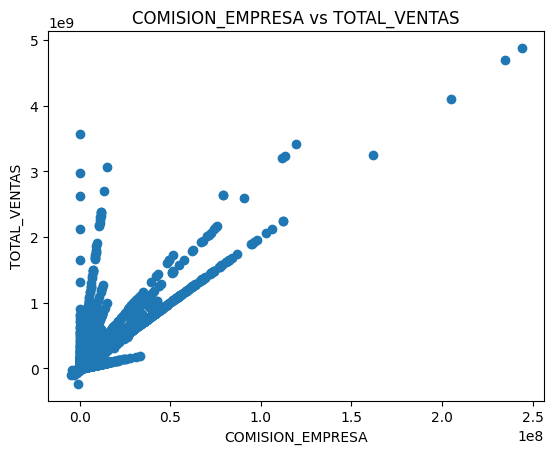

In [ ]:
plt.scatter(ventas_clean['COMISION_EMPRESA'], ventas_clean['TOTAL_VENTAS'])
plt.xlabel('COMISION_EMPRESA')
plt.ylabel('TOTAL_VENTAS')
plt.title('COMISION_EMPRESA vs TOTAL_VENTAS')
plt.show()

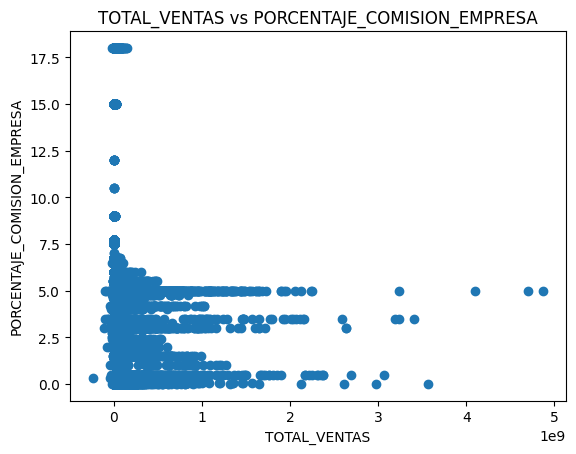

In [ ]:
plt.scatter(ventas_clean['TOTAL_VENTAS'], ventas_clean['PORCENTAJE_COMISION_EMPRESA'])
plt.xlabel('TOTAL_VENTAS')
plt.ylabel('PORCENTAJE_COMISION_EMPRESA')
plt.title('TOTAL_VENTAS vs PORCENTAJE_COMISION_EMPRESA')
plt.show()

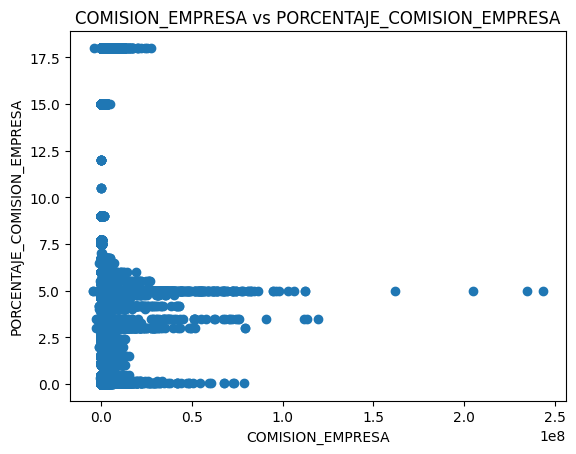

In [ ]:
plt.scatter(ventas_clean['COMISION_EMPRESA'], ventas_clean['PORCENTAJE_COMISION_EMPRESA'])
plt.xlabel('COMISION_EMPRESA')
plt.ylabel('PORCENTAJE_COMISION_EMPRESA')
plt.title('COMISION_EMPRESA vs PORCENTAJE_COMISION_EMPRESA')
plt.show()

In [ ]:
# Ver de  armar un pairplot o jointplot?

In [ ]:
# Probemos con verificar la siguiente fórmula:
ventas_clean['CALCULADA'] = ventas_clean['TOTAL_VENTAS'] * ventas_clean['PORCENTAJE_COMISION_EMPRESA']

In [ ]:
# Cuándo hay coincidencia exacta?
sum(abs(ventas_clean['COMISION_EMPRESA'] - ventas_clean['CALCULADA'] == 0))

190999

In [ ]:
# Es decir, sólo en 191 mil casos la fórmula se cumple exactamente.

In [ ]:
# Probemos con algún margen de error

In [ ]:
sum(abs(ventas_clean['COMISION_EMPRESA'] - ventas_clean['CALCULADA']) <= 0.01)

260873

In [ ]:
for x in [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1]:
  print('Para', x, 'de diferencia, tenemos', sum(abs(ventas_clean['COMISION_EMPRESA'] - ventas_clean['CALCULADA']) <= x), 'igualdades')

Para 0.01 de diferencia, tenemos 260873 igualdades
Para 0.1 de diferencia, tenemos 261053 igualdades
Para 0.2 de diferencia, tenemos 261109 igualdades
Para 0.3 de diferencia, tenemos 261131 igualdades
Para 0.4 de diferencia, tenemos 261155 igualdades
Para 0.5 de diferencia, tenemos 261175 igualdades
Para 1 de diferencia, tenemos 261272 igualdades


In [ ]:
# Para 261 mil casos (61%) la fórmula se verifica, con precisión menor a 1 entero.

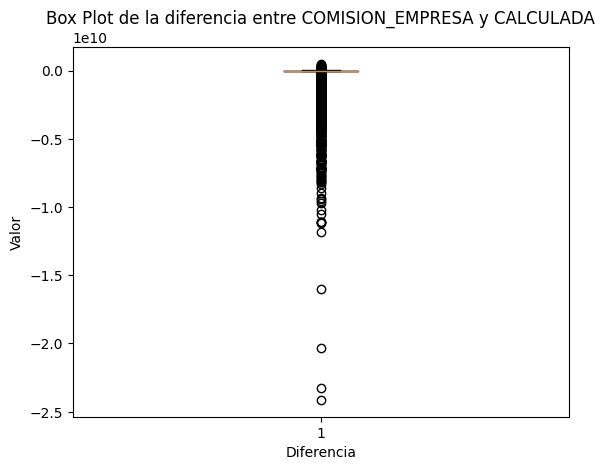

In [ ]:
# Grafiquemos la distribución de la diferencia

diferencia = ventas_clean['COMISION_EMPRESA'] - ventas_clean['CALCULADA']
plt.boxplot(diferencia.dropna())
plt.xlabel('Diferencia')
plt.ylabel('Valor')
plt.title('Box Plot de la diferencia entre COMISION_EMPRESA y CALCULADA')
plt.show()

In [ ]:
# Surge otra pregunta: habrá algun caso que la diferencia es positiva?
diferencia.describe()

count           431,506.00
mean        -22,527,052.49
std         175,482,129.81
min     -24,140,517,332.88
25%          -3,376,914.79
50%                   0.00
75%                   0.00
max         485,528,367.60
dtype: float64

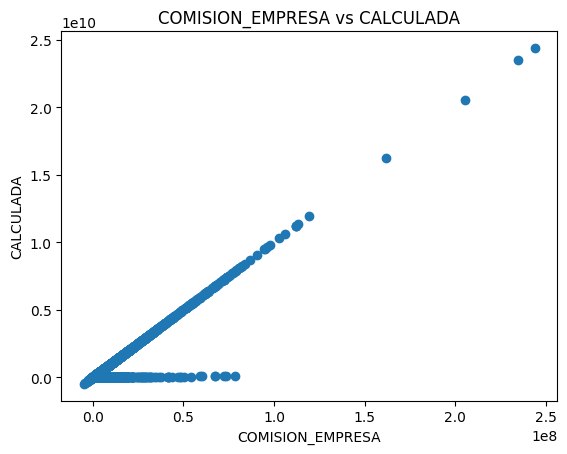

In [ ]:
plt.scatter(ventas_clean['COMISION_EMPRESA'], ventas_clean['CALCULADA'])
plt.xlabel('COMISION_EMPRESA')
plt.ylabel('CALCULADA')
plt.title('COMISION_EMPRESA vs CALCULADA')
plt.show()

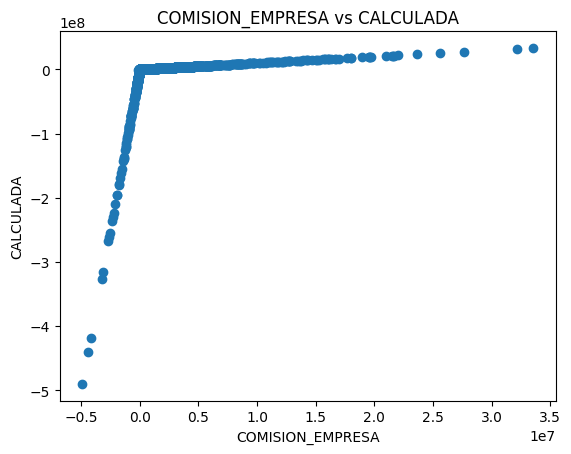

In [ ]:
# Poniendo foco en los casos en que COMISION_EMPRESA es mayor que CALCULADA:
plt.scatter(ventas_clean[ventas_clean['COMISION_EMPRESA'] > ventas_clean['CALCULADA']]['COMISION_EMPRESA'], ventas_clean[ventas_clean['COMISION_EMPRESA'] > ventas_clean['CALCULADA']]['CALCULADA'])
plt.xlabel('COMISION_EMPRESA')
plt.ylabel('CALCULADA')
plt.title('COMISION_EMPRESA vs CALCULADA')
plt.show()

In [ ]:
len(ventas_clean[ventas_clean['COMISION_EMPRESA'] > ventas_clean['CALCULADA']])

35345

In [ ]:
# Lo que figura en la variable COMISION_EMPRESA siempre es menor o igual que lo que surgiría de multiplicar TOTAL_VENTAS y PORCENTAJE_COMISION_EMPRESA

## Paso 2: Análisis estadístico descriptivo

1.	Calcula estadísticas descriptivas básicas de la serie temporal, como la media, mediana, desviación estándar, mínimo y máximo.


In [ ]:
ventas['TOTAL_VENTAS'].describe()

count         431,506.00
mean        7,544,169.21
std        48,373,412.84
min      -239,930,463.21
25%                 0.00
50%            90,996.38
75%         3,226,319.32
max     4,876,872,188.46
Name: TOTAL_VENTAS, dtype: float64

2.	Analiza la tendencia central y la dispersión de los datos. ¿Existen valores atípicos o extremos? ¿Cómo podrían afectar el análisis posterior?


In [ ]:
#PROPONER ALGUN PERCENTIL. Y PONER EL NRO ABSOLUTO EN CANTIDAD DE REGISSTRO

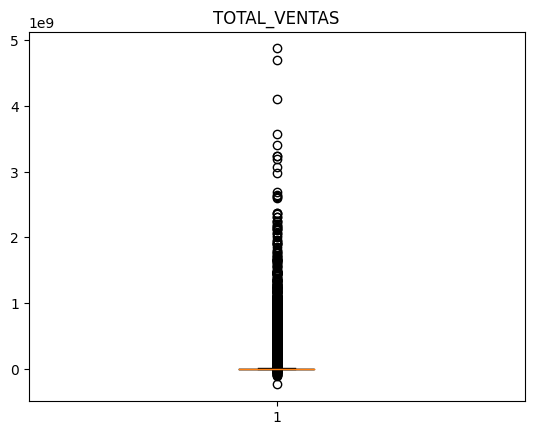

In [ ]:
plt.boxplot(ventas_clean['TOTAL_VENTAS'].dropna())
plt.title('TOTAL_VENTAS')
plt.show()

In [ ]:
# Los valores negativos y los 0 sesgan hacia abajo la media
# Los valores extremos positivos sesgan hacia arriba

In [ ]:
# Negativos
len(ventas_clean[ventas_clean['TOTAL_VENTAS'] < 0])

1390

In [ ]:
# Ceros
(ventas_clean['TOTAL_VENTAS'] == 0).sum()

181058

In [ ]:
# Extremos positivos
percentil_95 = np.percentile(ventas_clean['TOTAL_VENTAS'], 95)
len(ventas_clean[ventas_clean['TOTAL_VENTAS'] >= percentil_95])

21576

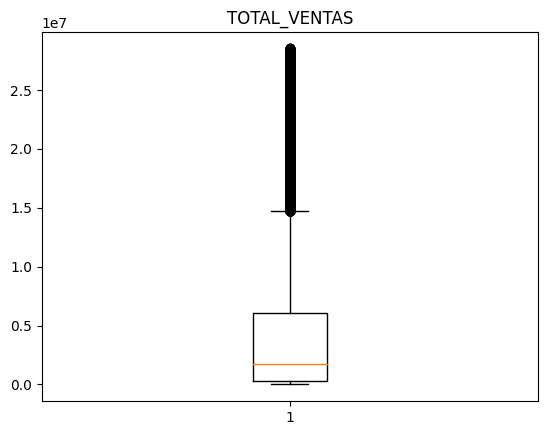

In [ ]:
# Al eliminar los extremos positivos y negativos
plt.boxplot(ventas_clean[(ventas_clean['TOTAL_VENTAS'] > 0) & (ventas_clean['TOTAL_VENTAS'] < percentil_95)]['TOTAL_VENTAS'])
plt.title('TOTAL_VENTAS')
plt.show()

In [ ]:
#Agregar histograma

3.	Grafica la serie temporal en un gráfico de líneas para visualizar la evolución de los datos a lo largo del tiempo.

In [ ]:
prueba6 = ventas_clean[['FECHA','TOTAL_VENTAS']].copy()

In [ ]:
prueba6['FECHA'].dtype

period[M]

In [ ]:
prueba6['TOTAL_VENTAS'].dtype

dtype('float64')

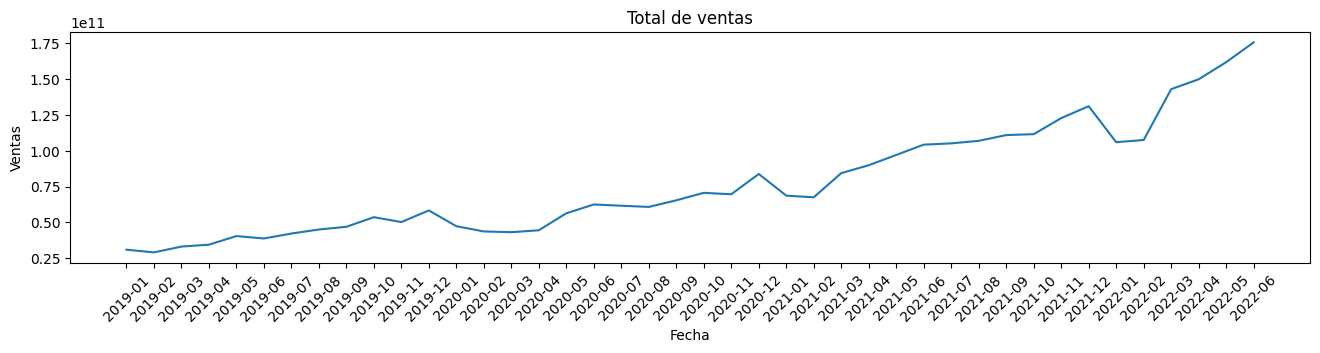

In [ ]:
prueba6_agregado = prueba6.groupby('FECHA')['TOTAL_VENTAS'].sum().reset_index()

plt.figure(figsize=(16, 3))

# Graficar el gráfico de líneas
plt.plot(prueba6_agregado['FECHA'].astype(str), prueba6_agregado['TOTAL_VENTAS'])

# Personalizar el gráfico
plt.title('Total de ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas')

# Rotar las etiquetas del eje X para mayor legibilidad (opcional)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [ ]:
len(prueba6_agregado)

42

In [ ]:
# GRAFICAR POR AÑO. LA TENDENCIA DE MESES. PARA VER ESTACIONALIDAD.

In [ ]:
# Se observa el efecto de la inflación y pareciera haber picos en noviembre/diciembre

4.	Calcula y grafica la función de autocorrelación para identificar posibles patrones de autocorrelación en los datos. (Es un término estadístico que se utiliza para describir la presencia o ausencia de correlación en los datos de las series temporales, indicando, si las observaciones pasadas influyen en las actuales.)

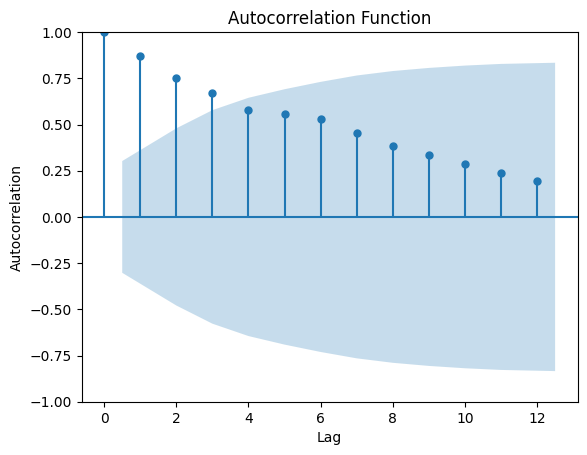

In [ ]:
# Calcular la función de autocorrelación
acf = plot_acf(prueba6_agregado['TOTAL_VENTAS'], lags=12)

# Graficar la función de autocorrelación
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.show()

In [ ]:
# Hay correlación estadísticamente significativa para el lag 1, 2 y 3.
# Lo que implica que observaciones pasadas influyen en las observaciones actuales de la serie temporal.
# De manera positiva